### Data Camp - Intermediate Regression with statsmodels in Python

### Chapter 1 - Parallel Slopes

- fish df, linear regression
        from statsmodels.formula.api import ols
        # target variable on left, explanatory variable on right
        mdl_maxx_vs_length = ols("mass_g ~ length_cm", data=fish).fit()
        # output is 1 slope coefficient and 1 intercept for 1 exp. variable
        print(mdl_mass_vs_length.params)

- change explanatory variable to species (categorical)
        # use +0 to tell program not to include intercept (easier to read)
        mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()
        # output: 1 coefficient for each species
        print(mdl_mass_vs_species.params)

- including both variable at same time
        mdl_mass_vs_both = ols("mass_g ~ length_cm + species + 0", data=fish).fit()
        #output: 1 slope coefficient & 1 intercept coefficient for each category
        print(mdl_mass_vs_both.params)

- coefficients are different when combined
- visualization of NUMERICAL exp variable
        sns.regplot(x='length_cm', y='mass_g', data=fish. ci=None)
        plt.show()
- visualization of CATEGORICAL exp variable
        sns.boxplot(x='species', y='mass_g', data=fish, showmeans=True)
- visualization of both exp variables
        #extract coefficients into seperate variables
        coeffs = mdl_mass_vs_both.params
        ic_bream, ic_perch, ic_pike, ic_roach, sl = coeffs
        #hue argument  colors categorical variable by values
        sns.scatterplot(x='length_cm', y='mass_g', hue='species', data=fish)
        #call axline for each categorical var category
        plt.axline(xy1=(0, ic_bream), slope=sl, color='blue')
        plt.axline(xy1=(0, ic_perch), slope=sl, color='green')
        plt.axline(xy1=(0, ic_pike), slope=sl, color='red')
        plt.axline(xy1=(0, ic_roach), slope=sl, color='orange')
- all slopes are the same so this method with one numeric and one categorical explanatory variable is called Parallel Slopes Linear Regression

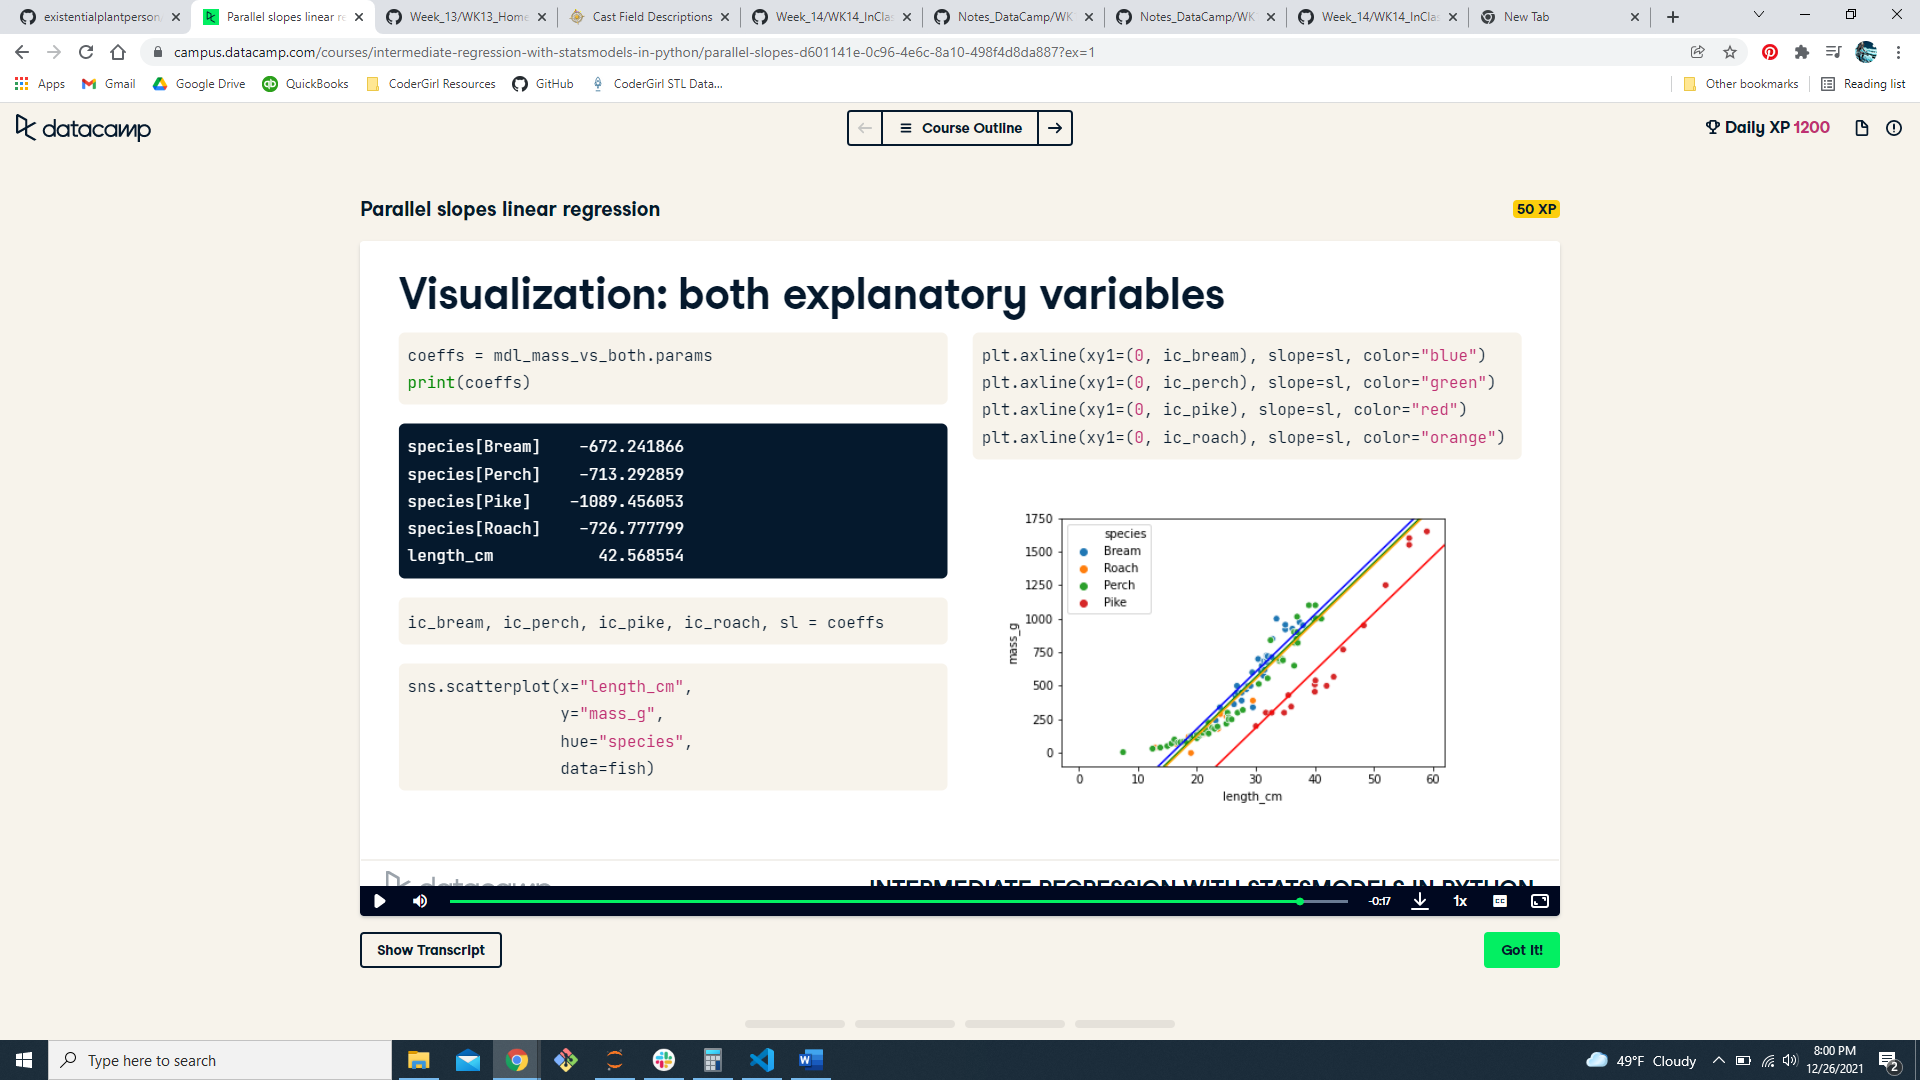

In [ ]:
## FITTING PARALLEL SLOPES LINEAR REGRESSION

# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

OUTPUT:
Intercept        8.224237
n_convenience    0.798080


# Fit a linear regression of price_twd_msq vs. house_age_years (3 categories), no intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

OUTPUT:
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264


# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years +0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

OUTPUT:
house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457

In [ ]:
## INTERPRETING PARALLEL SLOPES COEFFICIENTS

## For each additional nearby convenience store, the expected house price, 
## in TWD per square meter, increases by 0.79.

## For a house aged 0 to 15 years with zero nearby convenience stores, 
## the expected house price is 9.41 TWD per square meter.

In [ ]:
## VISUALIZING EACH EXPLANATORY VARIABLE

# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

# Show the plot
plt.show()

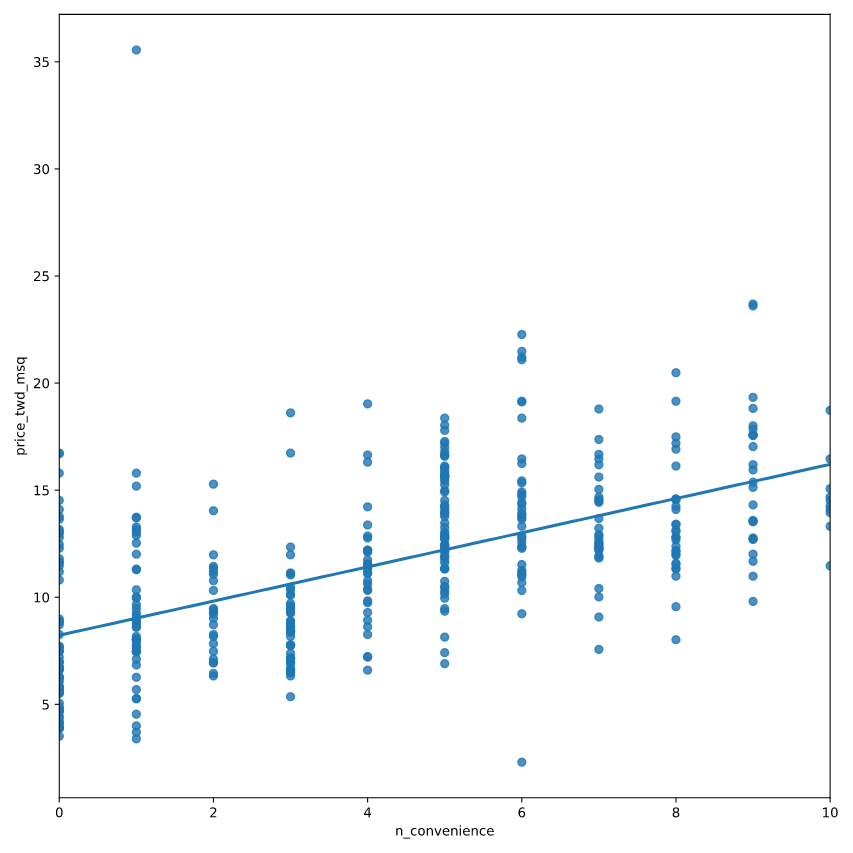

In [ ]:
# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x='house_age_years', y='price_twd_msq', data=taiwan_real_estate)

# Show the plot
plt.show()

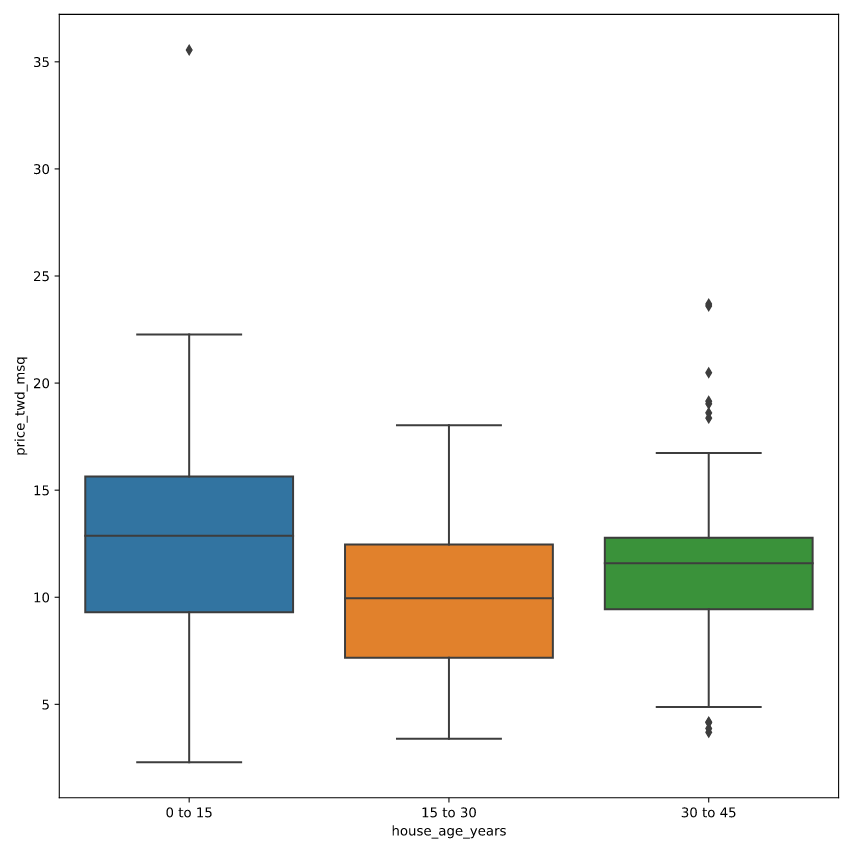

In [ ]:
## VISUALIZING PARRALEL SLOPES

# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

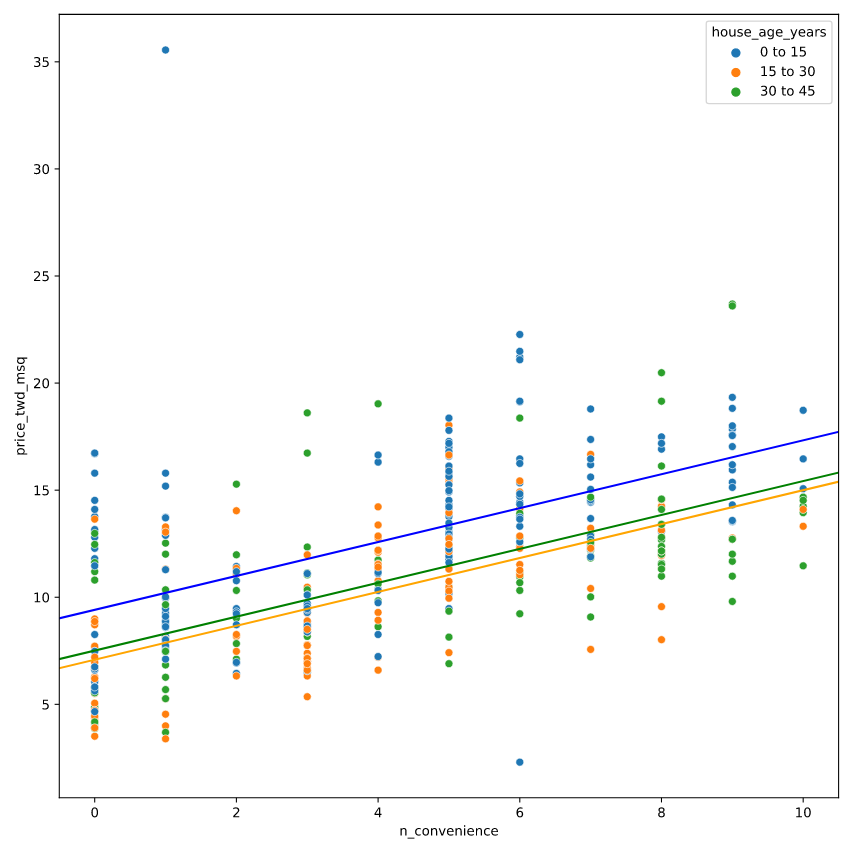

In [ ]:
#### Predicting Parallel Slopes
